# Further Analysis of first and last day of sight in Kaliningrad

The output/figures of this notebook are stored in the _first-last-day_ subdirectory.

In [1]:
# import libraries
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(
    style="darkgrid",
    color_codes=True,
    palette='Dark2',
)

# import (personal) functions & variables
from funcs import import_pickled_data, which_cols, number_of_day_to_date, highlight_years
from vals import sheets, yrs
species, species_long, species_summed = import_pickled_data()

### Is the temperature of the Kaliningrad dataset comparable to external measurements?

First, let's plot the tempertature per year in a single figure. Pandas' Timestamp doesn't work
without a year, so we'll add a new column _dys_ to the data table holding the number of days since Jan 1st. In order to compute the difference, we'll use pandas' Timedelta class. More info can be found in the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html).

In [25]:
# import single dataset
va = species[sheets[0]].reset_index()
# compute difference in days from Jan 1st of respective year
va['dys'] = [va.datetime[i] - pd.to_datetime(str(va.Year[i])+'-1-1') for i in range(len(va.index))]
# test output
va['dys'].dt.days

0        90
1        91
2        92
3        93
4        94
       ... 
8380    301
8381    302
8382    303
8383    304
8384    305
Name: dys, Length: 8385, dtype: int64

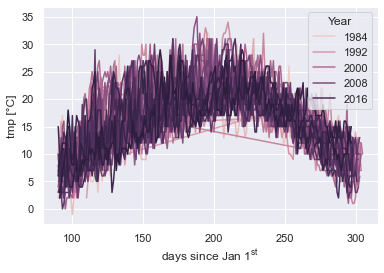

In [54]:
# plotting
fig, ax = plt.subplots()
sns.lineplot(
    data=va.query('Temp < 50'),
    x=va['dys'].dt.days, y='Temp', hue='Year',
    ax=ax
)
ax.set_xlabel(r'days since Jan 1$^{\default{st}}$')
ax.set_ylabel('tmp [°C]')
fig.savefig('../figs/first-last-day/temperature_per_year.pdf', bbox_inches='tight')

In the following, the years are aggregated to show the mean and standard deviation. 

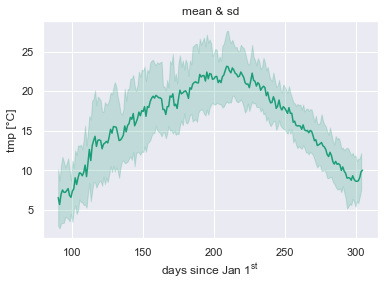

In [61]:
# more plotting...
fig, ax = plt.subplots()
sns.lineplot(
    data=va.query('Temp < 50'),
    x=va['dys'].dt.days, y='Temp',
    ci='sd', # standard deviation of data
)
ax.set_title('mean & sd')
ax.set_xlabel(r'days since Jan 1$^{\default{st}}$')
ax.set_ylabel('tmp [°C]')
fig.savefig('../figs/first-last-day/temperature_aggregated.pdf', bbox_inches='tight')